In [11]:
import pandas as pd
from utils import Options
import pickle as pkl
import numpy as np
from glob import glob
from readresults.readres_mvpa import merge_results, parse_roi_info, \
    get_subj_avg, fill_in_nvoxels, quick_get_results
import seaborn as sns
from plotting.plot import plot_by_nvoxels
import pingouin as pg

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
reslist = glob('../../MVPA_results/mainanalysis.csv')

In [3]:
results = quick_get_results(reslist)
results = results[(results['trainmodel']!='5_17')&(results['testmodel']!='5_17')]

In [40]:
results.head()

,subject,roi,approach,hemi,contrast,nvoxels,expected,correct,output,rawdistance,distance,trainmodel,testmodel,traintask,testtask
0,sub-001,LO,traintest,L,none,none,False,0.568182,0.477273,-0.049213,0.273033,5_15,5_15,train_test,train_test
1,sub-001,LO,traintest,L,none,none,True,0.492424,0.530303,-0.020548,0.081909,5_15,5_15,train_test,train_test
2,sub-001,LO,traintest,L,objvscr,100,False,0.545455,0.522727,-0.026943,0.170845,5_15,5_15,train_test,train_test
4,sub-001,LO,traintest,L,objvscr,200,False,0.579545,0.534091,-0.004519,0.236323,5_15,5_15,train_test,train_test
6,sub-001,LO,traintest,L,objvscr,300,False,0.568182,0.522727,-0.033724,0.253147,5_15,5_15,train_test,train_test


In [30]:
results.trainmodel.unique()

array(['5_15'], dtype=object)

In [5]:
results.trainmodel.unique()

array(['5_15'], dtype=object)

In [6]:
results.testmodel.unique()

array(['5_15'], dtype=object)

In [7]:
results.subject.nunique()

34

In [31]:
EVCdata = results[(results['roi']=='ba-17-18')&(results['nvoxels']!='none')]
LOCdata = results[(results['roi']=='LO')&(results['nvoxels']!='none')]

In [27]:
EVCdata.distance.max()

0.8161334856252099

In [28]:
EVCdata.distance.min()

-0.13157832851643786

In [29]:
LOCdata.distance.max()

0.5066853687490956

In [9]:
len(EVCdata)/34/30

4.0

In [13]:
EVCdata.roi.nunique()

1

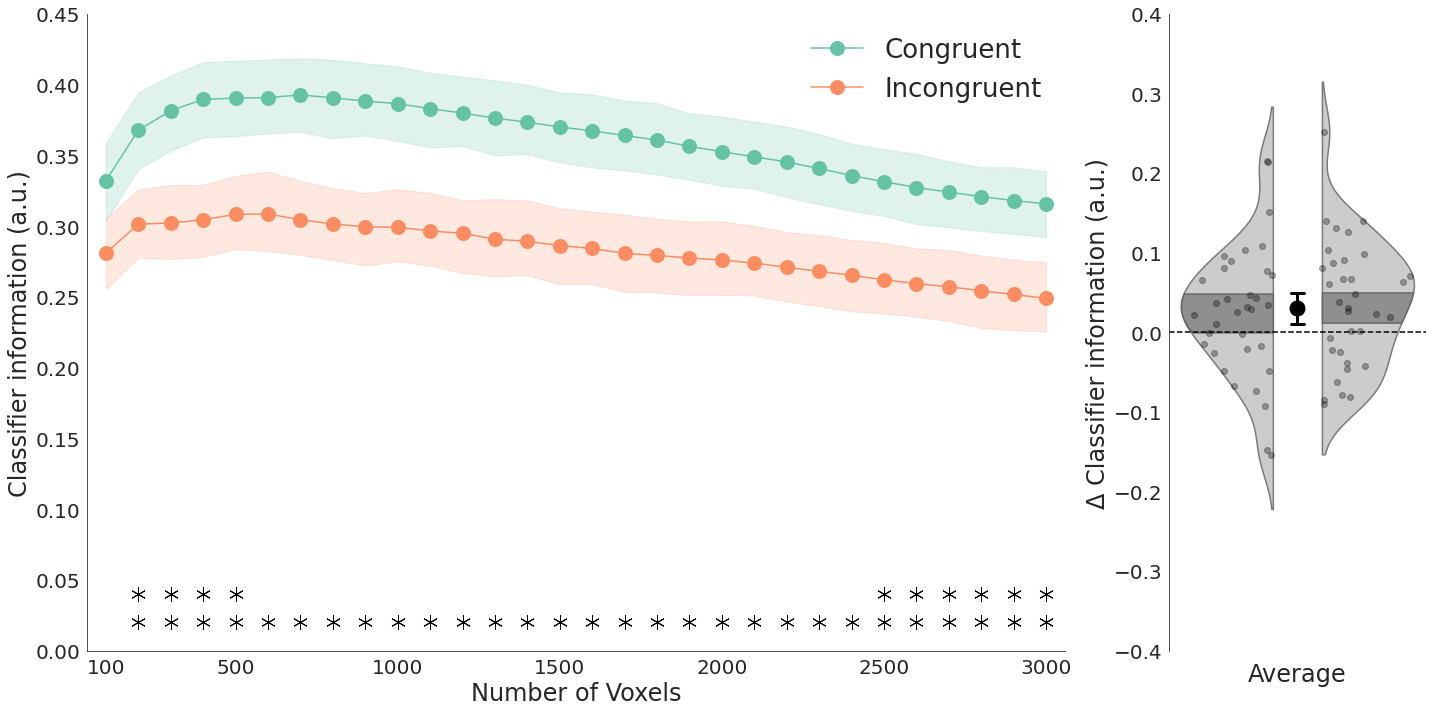

In [39]:
plot_by_nvoxels(EVCdata)

In [18]:
'ba-17-18' in EVCdata.roi.unique()

True

In [17]:
EVCdata.roi

52      ba-17-18
54      ba-17-18
56      ba-17-18
58      ba-17-18
60      ba-17-18
          ...   
5755    ba-17-18
5757    ba-17-18
5757    ba-17-18
5757    ba-17-18
5757    ba-17-18
Name: roi, Length: 4080, dtype: object

In [19]:
from plotting.plot import accs_to_diffs

avgdiffs = accs_to_diffs(EVCdata)

In [21]:
avgdiffs = avgdiffs.groupby(['subject', 'hemi']).mean().reset_index()

In [23]:
avgdiffs.difference.max()

0.25202020202020203

In [24]:
avgdiffs.difference.min()

-0.1541666666666667

stat_fun(H1): min=-1.303730 max=-0.711633
Running initial clustering
Using 131 thresholds from 0.00 to 1.30 for TFCE computation (h_power=2.00, e_power=0.50)
Found 20 clusters
Permuting 9999 times...


  0%|          |  : 0/9999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
[0.8016 0.5093 0.5406 0.5151 0.5151 0.4857 0.4423 0.4658 0.4912 0.4541
 0.4191 0.4912 0.4307 0.7372 0.5799 0.4968 0.4597 0.5747 0.4968 0.5747]


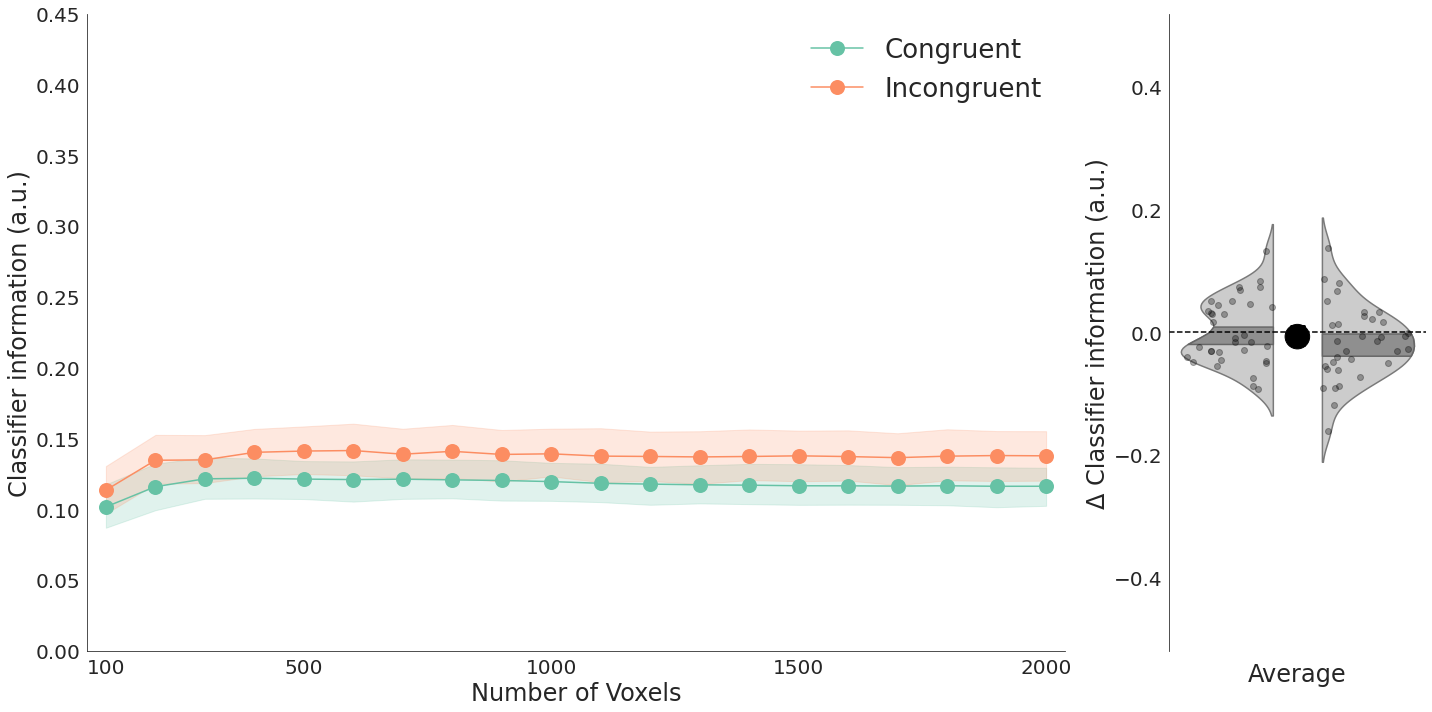

In [14]:
plot_by_nvoxels(LOCdata)

In [ ]:
maxvoxels = 3000
['100']+[str(x) for x in np.arange(500, maxvoxels+500, 500)]

In [ ]:
EVCdata[EVCdata['trainmodel']=='5_17'].correct.mean()

In [ ]:
LOCdata[LOCdata['trainmodel']=='5_17'].correct.mean()

In [ ]:
avgres

In [ ]:
results[results['approach']=='CV'].chunk.unique()

In [ ]:
from readresults.readres_mvpa import parse_roi_info

In [ ]:
results_avg = results.groupby(['subject', 'roi']).mean().reset_index()

In [ ]:
results = parse_roi_info(results)

In [ ]:
results = results.drop(['chunk'], axis=1)

In [ ]:
ind_vars = ['subject', 'roi', 'approach', 
            'traindataformat', 'testdataformat', 'traintask',
            'testtask', 'trainmodel', 'testmodel', 
            'hemi', 'contrast', 'nvoxels']
ind_vars = [i for i in ind_vars if i in results.columns and results[i].nunique() > 0]

In [ ]:
results_avg = results.groupby(ind_vars).mean().reset_index()

In [ ]:
results_avg = results_avg.drop(['chunk'], axis=1)

In [ ]:
results_avg.head()

In [ ]:
sns.barplot(data=results_avg, x='roi', y='distance')

In [ ]:
allinfo = 'LO_contr-objscrvsbas_top-1000'.split('_')

In [ ]:
allinfo[1] in ['L', 'R']

In [ ]:
allinfo

In [ ]:
contrindx = 1

In [ ]:
allinfo[contrindx].split('contr-')[1]

In [ ]:
a = [None, None, None]
all(v is None for v in a)

In [ ]:
sns.barplot(data=results, x='roi', y='correct')

In [ ]:
results[results['roi'].isin(['rBA17_18_L', 'rBA17_18_R',
                             'ba-17-18_L', 'ba-17-18_R'])].distance.mean()

In [ ]:
outputs = [0.3, 4.0, 6.9, 2.0, 3.5, 0.1]
targets = [4.7, 3.2, 1.0, 2.9, 3.2, 6.8]
splits = [1, 1, 1, 2, 2, 2]
example_res = pd.DataFrame(
    list(zip(outputs, targets, splits)),
    columns=['output', 'target', 'split'])

In [ ]:
example_res

In [ ]:
x = np.array([3, 4, 5])
np.isin(x, [5])

In [ ]:
example_res = np.nan
isinstance(example_res, float) and pd.isnull(example_res)

In [ ]:
pd.isna(example_res).all()

In [ ]:
outs2 = [0.5, 0.65, 1.2]
splits2 = [3, 3, 3]
example_res_2 = pd.DataFrame(
    list(zip(outs2, splits2)),
    columns=['output', 'split'])

In [ ]:
all_res = pd.concat([example_res, example_res_2])

In [ ]:
all_res

In [ ]:
for s in sorted(example_res.split.unique()):
    thissplitlength = len(example_res[example_res['split']==s])
    example_res.loc[example_res['split']==s, 'sample'] = list(range(thissplitlength))

In [ ]:
groupedres = example_res.groupby('sample').mean().reset_index().drop(['sample', 'split'], axis=1)

In [ ]:
groupedres

In [ ]:
agg_functions = {'output': 'mean', 'target': 'sum'}

#create new DataFrame by combining rows with same id values
res_new = example_res.groupby(example_res['split']).aggregate(
    agg_functions)

In [ ]:
res_new

In [ ]:
with open('/project/3018040.05/MVPA_results/traintest.pkl', 'rb') as f:
    results = pkl.load(f)

In [ ]:
res = results['train-trainm3-test-testm3_ba-17-18_L_betas'][0]
accuracy = res[:, 0]==res[:, 1]
res_df = pd.DataFrame(res, 
                      columns = ['output', 'target', 'distance', 'chunk'])

In [ ]:
res_df['trialno'] = 1

In [ ]:
res_df.to_numpy()

In [ ]:
accuracy.shape

In [ ]:
random = np.random.rand(accuracy.shape[0])

In [ ]:
random

In [ ]:
output = (res[:, 0] == np.unique(res[:, 1])[0]).astype(int)

In [ ]:
output

In [ ]:
np.mean([True, True, False])

In [ ]:
outputs = 

In [ ]:
res_df.distance.dtype

In [ ]:
results['train-trainm3-test-testm3_ba-17-18_L_betas'][0].shape

In [ ]:
opt = Options()

In [ ]:
import configs

In [ ]:
dir(configs)

In [ ]:
configs.mvpa_outdir

In [ ]:
from configs import mvpa_outdir as data_dir

In [ ]:
from six.moves import cPickle as pickle

In [ ]:
data_dir

In [ ]:
mvpa_datadir

In [ ]:
x

In [ ]:
opt.sub = 'sub-001'

In [ ]:
opt.sub

In [ ]:
eventsfile = '/project/3018040.05/bids/sub-001/func/sub-001_task-test_run-1_events.tsv'
behavfile = '/project/3018040.05/bids/sub-001/func/sub-001_task-test_beh.tsv'
events = pd.read_csv(eventsfile, sep='\t')
behav = pd.read_csv(behavfile, sep='\t')

In [ ]:
events

In [ ]:
bedscenes = [2, 5, 6, 7, 9, 13, 14, 17, 18, 20]
bedindx = behav.index[behav['Scene'].isin(bedscenes)]
couchindx = behav.index[~behav['Scene'].isin(bedscenes)]

In [ ]:
bedindx

In [ ]:
couchindx